# Monte Carlo Simulation Example

- This example is based on Michael Pyrcz **Monte Carlo Simulation** Lecture:

https://www.youtube.com/watch?v=Qb8TsSINpnU&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=13&t=505s
<br>
<br>
A project is about to drill into two formations. Unit A thickness ~ N(10,2), while Unit B thickness ~ N(24,4). Suppose that thickness of units are **independent**.
<br>
<br>
1. Get the total thickness distribution. Note that the transfer function is given by:


          Total Thickness = Unit A Thickness + Unit B Thickness


2. Calculate both **mean** and **variance** of the total thickness.

3. Calculate both **P(10)** and **P(90)** of total thickness.

## Monte Carlo Simulation Function

In [30]:
monte_carlo <- function(n=NA,mean=NA,sd=NA){
  a <- rep(NA,n)
  for (i in seq_along(a)){
    p_value <- runif(1)
    a[i] <- qnorm(p_value,mean,sd)
  }
  return(round(a,2))
}

## Unit A Thickness

In [31]:
# Unit A thickness:
A <- monte_carlo(n=1000,mean=10,sd=2)

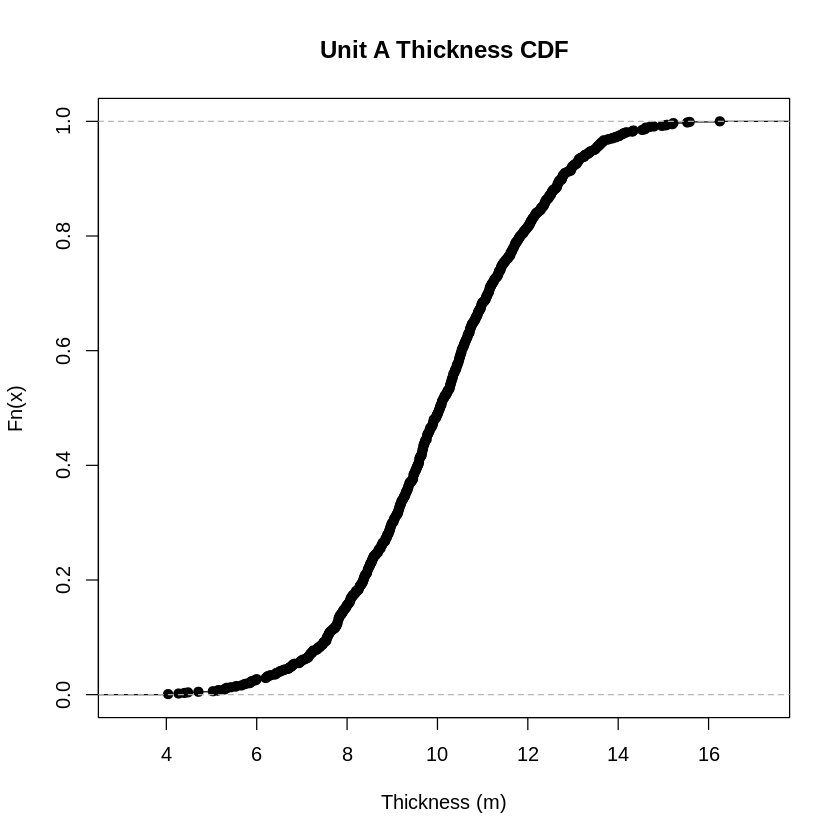

In [32]:
# Unit A thickness CDF:
plot(ecdf(A),
     main="Unit A Thickness CDF",
     xlab="Thickness (m)")

## Unit B Thickness

In [33]:
# Unit B thickness:
B <- monte_carlo(n=1000,mean=24,sd=4)

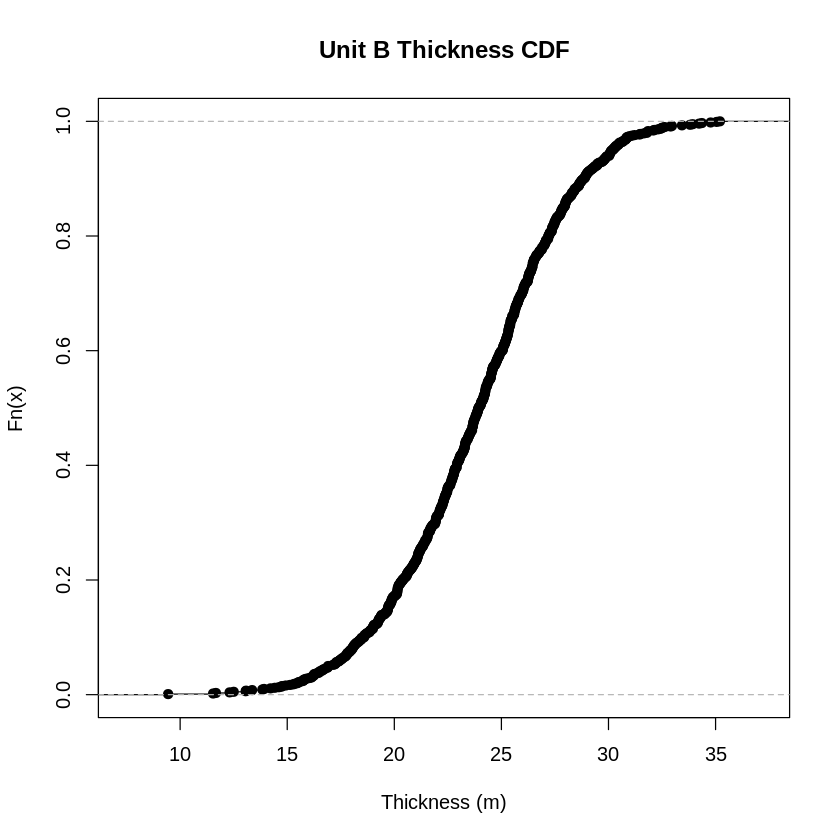

In [34]:
# Unit B thickness CDF:
plot(ecdf(B),
     main="Unit B Thickness CDF",
     xlab="Thickness (m)")

## Total Thickness

In [35]:
# Total thickness:
tot_tck = A + B

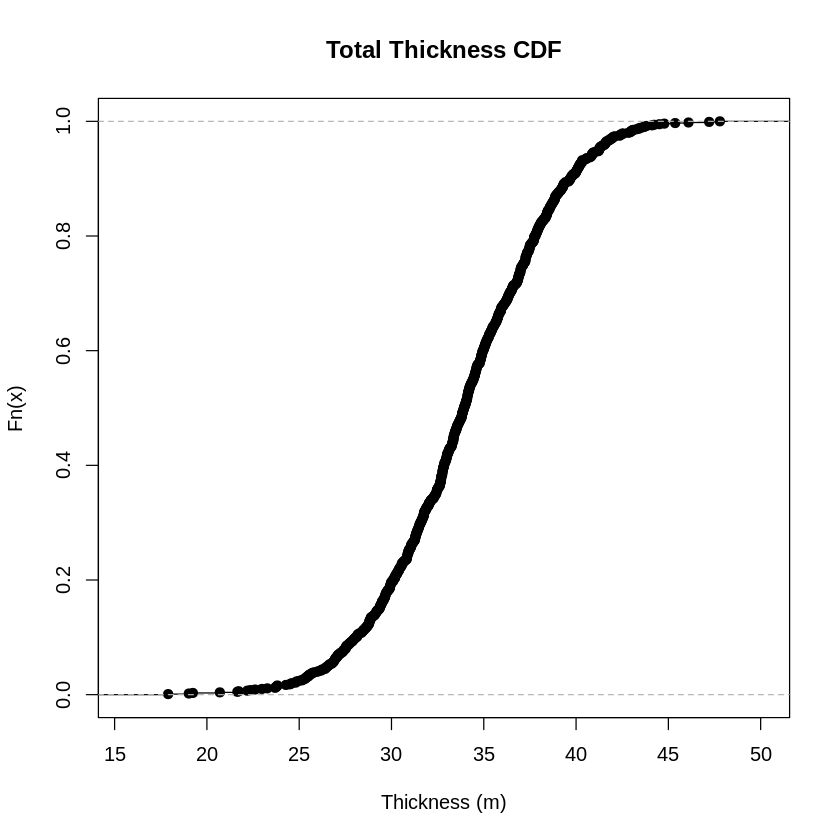

In [36]:
# Total thickness CDF:
plot(ecdf(tot_tck),
     main="Total Thickness CDF",
     xlab="Thickness (m)")

## Total Thickness Statistics

In [37]:
# Total thickness mean:
tot_tck_mean <- round(mean(tot_tck),2)
cat("Total thickness mean =",tot_tck_mean,"m")

Total thickness mean = 33.91 m

In [38]:
# Total thickness variance:
tot_tck_var <- round(var(tot_tck),2)
cat("Total thickness variance =",tot_tck_var,"m²")

Total thickness variance = 20.1 m²

In [39]:
# Total thickness P(10):
tot_tck_p10 <- quantile(tot_tck,probs = 0.1)
cat("Total thickness P(10) =",tot_tck_p10,"m")

Total thickness P(10) = 28.125 m

In [40]:
# Total thickness P(90):
tot_tck_p90 <- quantile(tot_tck,probs = 0.9)
cat("Total thickness P(90) =",tot_tck_p90,"m")

Total thickness P(90) = 39.692 m

## Conclusion

- E[A+B] = E[A] + E[B] ~ 34 m

- Var[A+B] = Var[A] + Var[B] ~ 20 m²
  - OBS.: remember that A and B are independent random variables

- Remember that **Central Limit Theorem** tells that, if we sum "n" random variables together, the resulting random variable distribution ~ **N(n.mean, n.std)**, when "n" tends to infinity.